In [2]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import math 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.preprocessing import scale
import statsmodels.formula.api as smf
import statsmodels.api as sm
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
import seaborn as sb
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegressionCV as logCV
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
matplotlib.rcParams.update({'font.size': 12})
% matplotlib inline

from sklearn.cross_validation import train_test_split

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Part 1: Load Data

In [3]:
df1 = pd.read_csv('/Users/fahad/Documents/Data_Science/DataProject/Final_Project_Updated/X.csv')
df2 = pd.read_csv('/Users/fahad/Documents/Data_Science/DataProject/Final_Project_Updated/Y.csv')
df1['comp4_xt+1'] = df2
dff = df1
dff

,comp1_xt,comp1_xt1,comp1_xt-2,comp1_xt-3,comp1_xt-4,comp1_xt-5,comp1_xt-6,comp1_xt-7,comp1_xt-8,comp1_xt-9,...,comp9_xt-12,comp9_xt-13,comp9_xt-14,comp9_xt-15,comp9_xt-16,comp9_xt-17,comp9_xt18,comp9_xt19,comp9_xt-20,comp4_xt+1
0,-0.049917,-0.015821,-0.014748,-0.020682,0.020328,-0.033654,-0.015738,-0.000337,0.012430,-0.007476,...,-0.016799,-0.006168,-0.003306,0.005674,-0.010847,0.003759,0.001413,0.014245,-0.026429,0.008376
1,0.026143,-0.049917,-0.015821,-0.014748,-0.020682,0.020328,-0.033654,-0.015738,-0.000337,0.012430,...,-0.001938,-0.016799,-0.006168,-0.003306,0.005674,-0.010847,0.003759,0.001413,0.014245,-0.001133
2,0.045449,0.026143,-0.049917,-0.015821,-0.014748,-0.020682,0.020328,-0.033654,-0.015738,-0.000337,...,0.002906,-0.001938,-0.016799,-0.006168,-0.003306,0.005674,-0.010847,0.003759,0.001413,0.001854
3,0.027492,0.045449,0.026143,-0.049917,-0.015821,-0.014748,-0.020682,0.020328,-0.033654,-0.015738,...,0.009625,0.002906,-0.001938,-0.016799,-0.006168,-0.003306,0.005674,-0.010847,0.003759,0.000720
4,-0.026302,0.027492,0.045449,0.026143,-0.049917,-0.015821,-0.014748,-0.020682,0.020328,-0.033654,...,-0.007210,0.009625,0.002906,-0.001938,-0.016799,-0.006168,-0.003306,0.005674,-0.010847,0.003592
5,0.020257,-0.026302,0.027492,0.045449,0.026143,-0.049917,-0.015821,-0.014748,-0.020682,0.020328,...,0.012464,-0.007210,0.009625,0.002906,-0.001938,-0.016799,-0.006168,-0.003306,0.005674,0.009179
6,0.002213,0.020257,-0.026302,0.027492,0.045449,0.026143,-0.049917,-0.015821,-0.014748,-0.020682,...,0.002854,0.012464,-0.007210,0.009625,0.002906,-0.001938,-0.016799,-0.006168,-0.003306,0.005871
7,0.005684,0.002213,0.020257,-0.026302,0.027492,0.045449,0.026143,-0.049917,-0.015821,-0.014748,...,-0.019185,0.002854,0.012464,-0.007210,0.009625,0.002906,-0.001938,-0.016799,-0.006168,-0.005871
8,0.091676,0.005684,0.002213,0.020257,-0.026302,0.027492,0.045449,0.026143,-0.049917,-0.015821,...,0.002418,-0.019185,0.002854,0.012464,-0.007210,0.009625,0.002906,-0.001938,-0.016799,0.005063
9,0.012481,0.091676,0.005684,0.002213,0.020257,-0.026302,0.027492,0.045449,0.026143,-0.049917,...,-0.004843,0.002418,-0.019185,0.002854,0.012464,-0.007210,0.009625,0.002906,-0.001938,-0.000101


## Data preparing

In [4]:
Y = (dff['comp4_xt+1'])
dff1= dff.drop('comp4_xt+1', axis = 1)

model1 = sm.OLS(Y,dff1)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:             comp4_xt+1   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     1.539
Date:                Sat, 08 Dec 2018   Prob (F-statistic):           7.97e-06
Time:                        03:14:39   Log-Likelihood:                 7289.4
No. Observations:                2501   AIC:                        -1.420e+04
Df Residuals:                    2312   BIC:                        -1.310e+04
Df Model:                         189                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
comp1_xt       -0.0477      0.017     -2.832      

We see that R-sqr value is 0.112. We rety improving it by dropping p values of the predictors that are not significant 

In [5]:
sig_features = pd.DataFrame(results1.pvalues, index=dff1.columns, columns={'pvalue'})
sigCols1 = sig_features[sig_features['pvalue']<0.1].index.values
df = dff[sigCols1]

We do a linear fit with our selected value. However, R-sqr value dropped. This was probably because when looking at stocks the conditions at different times affect differently

In [6]:
model2 = sm.OLS(Y,df)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:             comp4_xt+1   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     5.353
Date:                Sat, 08 Dec 2018   Prob (F-statistic):           4.75e-19
Time:                        03:14:40   Log-Likelihood:                 7220.0
No. Observations:                2501   AIC:                        -1.438e+04
Df Residuals:                    2471   BIC:                        -1.421e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
comp1_xt       -0.0462      0.015     -3.038      

Using cross validation on a regression model we look at the top 10 rinteraction terms comaring them with our baseline mean. The code is commented out because it takes a lot of time to process

In [7]:
# from sklearn.linear_model import LinearRegression
# from sklearn.cross_validation import cross_val_score
# from sklearn.cross_validation import KFold
# regression = LinearRegression(normalize=True)
# crossvalidation = KFold(n=dff1.shape[0], n_folds=5, shuffle=True, random_state=1)
# df2 = pd.DataFrame(dff1,columns=dff1.columns.values)
# baseline = np.mean(cross_val_score(regression, df2, Y, scoring='r2', cv=crossvalidation,n_jobs=1))
# interactions = list()
# for feature_A in df.columns.values:
#     for feature_B in df.columns.values:
#         if feature_A > feature_B:
#             df2['interaction'] = df2[feature_A] * df2[feature_B]
#             score = np.mean(cross_val_score(regression, df2, Y, scoring='r2',cv=crossvalidation, n_jobs=1))
#             if score > baseline:
#                 interactions.append((feature_A, feature_B, round(score,3)))                

We create a new Data frame with the top two interaction terms

In [8]:
df3 = dff1.copy()
int1 = np.array(dff1['comp6_xt-3'])
int2 = np.array(dff1['comp3_xt-7'])
int12 = int1*int2
int3 = np.array(dff1['comp5_xt-7'])
int13 = int1*int3
df3['comp6_xt-3*comp3_xt-7'] = int12
df3['comp6_xt-3*comp5_xt-7'] = int13

Now we do a linear fit again and see the R-sqr value which has increased

In [9]:
model3 = sm.OLS(Y,df3)
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:             comp4_xt+1   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     1.966
Date:                Sat, 08 Dec 2018   Prob (F-statistic):           1.10e-12
Time:                        03:14:43   Log-Likelihood:                 7329.6
No. Observations:                2501   AIC:                        -1.428e+04
Df Residuals:                    2310   BIC:                        -1.316e+04
Df Model:                         191                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
comp1_xt                 -0.04

To further improve our model we try finding further interaction terms and again add top 2 to a new data frame

In [10]:
# regression = LinearRegression(normalize=True)
# crossvalidation = KFold(n=df3.shape[0], n_folds=5, shuffle=True, random_state=1)
# df4 = pd.DataFrame(df3,columns=df3.columns.values)
# baseline = np.mean(cross_val_score(regression, df4, Y, scoring='r2', cv=crossvalidation,n_jobs=1))
# interactions = list()
# for feature_A in df.columns.values:
#     for feature_B in df.columns.values:
#         if feature_A > feature_B:
#             df4['interaction'] = df4[feature_A] * df4[feature_B]
#             score = np.mean(cross_val_score(regression, df4, Y, scoring='r2',cv=crossvalidation, n_jobs=1))
#             if score > baseline:
#                 interactions.append((feature_A, feature_B, round(score,3))) 

In [11]:
df4 = df3.copy()
int1 = np.array(df3['comp5_xt-19'])
int2 = np.array(df3['comp4_xt-3'])
int12 = int1*int2
int3 = np.array(df3['comp8_xt-2'])
int4 = np.array(df3['comp1_xt'])
int34 = int3*int4
df4['comp5_xt-19*comp4_xt-3'] = int12
df4['comp8_xt-2*comp8_xt-2'] = int34    

We fit the model again and see a significant increase in the R-sqr value

In [12]:
model4 = sm.OLS(Y,df4)
results4 = model4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:             comp4_xt+1   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     2.556
Date:                Sat, 08 Dec 2018   Prob (F-statistic):           1.65e-24
Time:                        03:14:46   Log-Likelihood:                 7383.5
No. Observations:                2501   AIC:                        -1.438e+04
Df Residuals:                    2308   BIC:                        -1.326e+04
Df Model:                         193                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
comp1_xt                  -0

Now since our data frame is too big we try to decrease it's size with the least decrease in R_sqr value

In [13]:
sig_features = pd.DataFrame(results4.pvalues, index=df4.columns, columns={'pvalue'})
impCols1 = sig_features[sig_features['pvalue']<0.8].index.values
df5 = df4[impCols1]
model5 = sm.OLS(Y,df5)
results5 = model5.fit()
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:             comp4_xt+1   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     3.102
Date:                Sat, 08 Dec 2018   Prob (F-statistic):           1.09e-31
Time:                        03:14:49   Log-Likelihood:                 7383.2
No. Observations:                2501   AIC:                        -1.444e+04
Df Residuals:                    2340   BIC:                        -1.351e+04
Df Model:                         161                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
comp1_xt                  -0

Finally we do a train/test CV split

In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df5, Y, test_size = 0.3, random_state = 1)

## Part 2: Explore Various Regression Models and Find the Best to Predict  $x_{t+1}$


## Model: Linear Regression
We carry out linear regression after splitting our data into test and training set by cross validation and using the significant values only based on the p_values

Correlation: [[1.         0.47389475]
 [0.47389475 1.        ]]
Correlation Test: [[1.         0.14387275]
 [0.14387275 1.        ]]


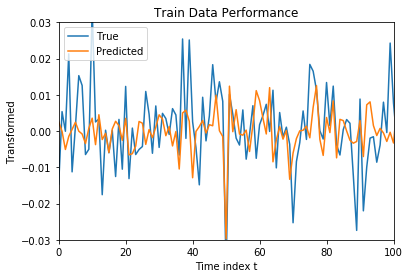

In [229]:
lr = LinearRegression()
lr.fit(Xtrain,ytrain)
pred = lr.predict(Xtrain)
pred2 = lr.predict(Xtest)
plt.xlim(0,100)
plt.ylim(-0.03,0.03)
plt.ylabel('Transformed')
plt.title('Train Data Performance')
plt.plot(range(len(ytrain)),ytrain)
plt.plot(range(len(Xtrain)),pred)
plt.legend(['True', 'Predicted'], loc='upper left')
plt.xlabel('Time index t')
print("Correlation:",np.corrcoef(ytrain,pred))
print("Correlation Test:",np.corrcoef(ytest,pred2))

We are using correlation matrices throughout this project to look at the accuracy of the data. However, at some places MSE is also calculated. It can be seen that Correlation is around 45%-47%. Which is not good but is decent

## Model: Lasso Regression
We carry out Lasso Regression. We choose our paramaters by Lasso Cross Validation technique

The optimal lazbda for lasso is 1.1802417145853246e-05


Text(0,0.5,'Cross Validation Error')

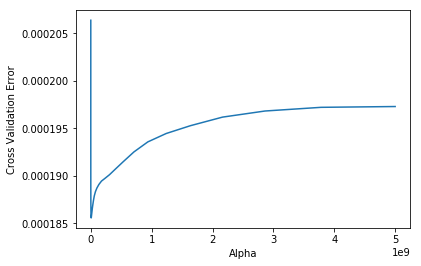

In [230]:
# Find best lambda for Lasso Regression
alphas = 10**np.linspace(10, -2, 100) * 0.5
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(Xtrain, ytrain)
print('The optimal lazbda for lasso is %s' % lassocv.alpha_)
mean_errors_cv = np.mean(lassocv.mse_path_, axis=1)

plt.plot(alphas, mean_errors_cv)
plt.xlabel('Alpha')
plt.ylabel('Cross Validation Error')

In [231]:
# Fit model with Lasso 
from sklearn.metrics import mean_squared_error
lasso = Lasso(max_iter=10000, normalize=True)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(Xtrain, ytrain)
pred1 = lasso.predict(Xtrain)
pred3 = lasso.predict(Xtest)
print("Correlation:",np.corrcoef(ytrain,pred1))
print("Correlation Test:",np.corrcoef(ytest,pred3))

Correlation: [[1.         0.37096953]
 [0.37096953 1.        ]]
Correlation Test: [[1.         0.12903983]
 [0.12903983 1.        ]]


It can be seen that the plot does not help much in getting the optimal value of the alpha. Hence, we had also calculated the optimal value by Lasso Cross Validation. Using that value we carry out Lasso fit. Later, the MSE and the correlation is also calculated. MSE is although low but the correlation is somewhat less than what we had gotten with linear regression

## Model: Random Forest Regression
We carry out random forest regression choosing our values of estimators and depth by KFold CV(code is commented out because takes a long time to run. However, the values were recorded) and then by bagging. Bagging gave relatively same but 'faster' results

In [232]:
model = RandomForestRegressor() #Define RF Model
# cv_method = KFold(n_splits=5,shuffle=True,random_state = 1) #Define CV method

# score = np.array([]) #errors
# n_estimator = np.array([]) # array to store value of the estimator

# for est in range(1,100,5):
#     n_estimator = np.append(n_estimator,est)
#     model.set_params(n_estimators=est)
#     error = -1*np.mean(cross_val_score(model,Xtrain,ytrain,cv = cv_method,scoring = 'neg_mean_squared_error')) #Run cross validation with a score
#     score = np.append(score,error)
        
# plt.plot(n_estimator,score,marker = 'o') # Plot results
# plt.title('Leave One Out')
# plt.xlabel('N_Estimator')
# plt.ylabel('MSE')

In [233]:
# model1 = RandomForestRegressor() #Define ML Model
# cv_method = KFold(n_splits=5,shuffle=True,random_state = 1)
# n_estimator = np.array([])
# score = np.array([])
# min_samples_leaf = np.array([]) # array to store order of polynomial
# for est in range(1,10,5):
#     n_estimator = np.append(n_estimator,est)
#     model.set_params(max_depth=est)
#     error = -1*np.mean(cross_val_score(model,Xtrain,ytrain,cv = cv_method,scoring = 'neg_mean_squared_error')) #Run cross validation with a score
#     score = np.append(score,error)
        
# plt.plot(n_estimator,score,marker = 'o') # Plot results
# plt.title('Leave One Out')
# plt.xlabel('Max_depth')
# plt.ylabel('MSE')

In [234]:
rf = RandomForestRegressor(n_estimators = 10, max_depth=5, min_samples_leaf= 5, max_features = 10, random_state = 1)
# Train the model on training data
rf.fit(Xtrain, ytrain);
# Use the forest's predict method on the test data
pred3 = rf.predict(Xtrain)
print("Correlation Before Bagging:",np.corrcoef(ytrain,pred3))

Correlation Before Bagging: [[1.         0.45697925]
 [0.45697925 1.        ]]


## Bagging
We try to find optimal n_estimator, max_depth and max_features by bagging

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/ana

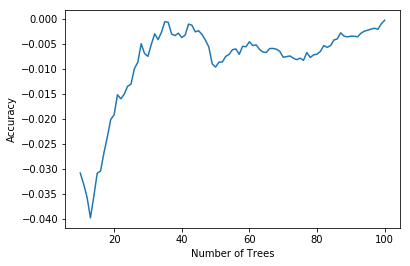

In [235]:
error_rate_bag = np.array([])
num_trees_bag = np.array([])

min_trees = 10
max_trees = 100

bagged_tree = RandomForestRegressor(warm_start=True, oob_score=True,max_depth=5, min_samples_leaf= 5, max_features = 10,random_state = 1)

for i in range(min_trees,max_trees+1):
    bagged_tree.set_params(n_estimators=i)
    bagged_tree.fit(Xtrain, ytrain)
    error_rate_bag = np.append(error_rate_bag,bagged_tree.oob_score_)
    num_trees_bag = np.append(num_trees_bag,i)
    
plt.plot(num_trees_bag,error_rate_bag);
plt.xlabel('Number of Trees');
plt.ylabel('Accuracy');

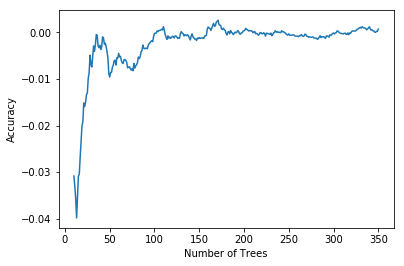

In [236]:
min_trees = 100
max_trees = 350

bagged_tree = RandomForestRegressor(warm_start=True, oob_score=True,max_depth=5, min_samples_leaf= 5, max_features = 10,random_state = 1)

for i in range(min_trees,max_trees+1):
    bagged_tree.set_params(n_estimators=i)
    bagged_tree.fit(Xtrain, ytrain)
    error_rate_bag = np.append(error_rate_bag,bagged_tree.oob_score_)
    num_trees_bag = np.append(num_trees_bag,i)
    
plt.plot(num_trees_bag,error_rate_bag);
plt.xlabel('Number of Trees');
plt.ylabel('Accuracy');

Regression with optimal n_estimator and decent values for max_depth and features

In [237]:
rf = RandomForestRegressor(n_estimators = 30, max_depth=5, min_samples_leaf= 5, max_features = 10, random_state = 1)
# Train the model on training data
rf.fit(Xtrain, ytrain);
# Use the forest's predict method on the test data
pred3 = rf.predict(Xtrain)
pred4 = rf.predict(Xtest)
print("Correlation:",np.corrcoef(ytrain,pred3))
print("Correlation Test:",np.corrcoef(ytest,pred4))

Correlation: [[1.         0.57037914]
 [0.57037914 1.        ]]
Correlation Test: [[ 1.         -0.07202506]
 [-0.07202506  1.        ]]


In [238]:
# error_rate_bag = np.array([])
# num_trees_bag = np.array([])

# minn= 1
# maxx = 25

# bagged_tree = RandomForestRegressor(oob_score=True, n_estimators = 100, random_state = 1)

# for i in range(minn,maxx+1):
#     bagged_tree.set_params(max_features=i)
#     bagged_tree.fit(X_train, y_train)
#     error_rate_bag = np.append(error_rate_bag,bagged_tree.oob_score_)
#     num_trees_bag = np.append(num_trees_bag,i)
    
# plt.plot(num_trees_bag,error_rate_bag,c='red');
# plt.xlabel('Max Features');
# plt.ylabel('Accuracy');

In [239]:
# error_rate_bag = np.array([])
# num_trees_bag = np.array([])

# minn= 20
# maxx = 50

# bagged_tree = RandomForestRegressor(oob_score=True, n_estimators = 100, max_features = 10, random_state = 1)

# for i in range(minn,maxx+1):
#     bagged_tree.set_params(max_depth=i)
#     bagged_tree.fit(X_train, y_train)
#     error_rate_bag = np.append(error_rate_bag,bagged_tree.oob_score_)
#     num_trees_bag = np.append(num_trees_bag,i)
    
# plt.plot(num_trees_bag,error_rate_bag,c='red');
# plt.xlabel('Max Depth');
# plt.ylabel('Accuracy');

Regression with optimal value shows a significant increase in correlation in training but a significant decrease in test

In [240]:
Reg = RandomForestRegressor(n_estimators = 30, max_depth=35,min_samples_leaf= 5,max_features=10 , random_state = 1)

Reg.fit(Xtrain,ytrain)
pred3 = Reg.predict(Xtrain)
pred4 = Reg.predict(Xtest)
print("Correlation:",np.corrcoef(ytrain,pred3))
print("Correlation Test:",np.corrcoef(ytest,pred4))

Correlation: [[1.         0.91890377]
 [0.91890377 1.        ]]
Correlation Test: [[ 1.         -0.03069076]
 [-0.03069076  1.        ]]


## Part 3: Explore Various Classification Models and Find the Best to Predict  $x_{t+1} >= 0$

## Data Preparing done as before

In [15]:
dflo = dff.copy()
encode = lambda x: 1 if x > 0 else 0
dflo['comp4_xt+1'] = dflo['comp4_xt+1'].map(encode)

dff1= dflo.drop('comp4_xt+1', axis = 1)
df3 = dff1.copy()
int1 = np.array(dff1['comp6_xt-3'])
int2 = np.array(dff1['comp3_xt-7'])
int12 = int1*int2
int3 = np.array(dff1['comp5_xt-7'])
int13 = int1*int3
df3['comp6_xt-3*comp3_xt-7'] = int12
df3['comp6_xt-3*comp5_xt-7'] = int13
df4 = df3.copy()
int4 = np.array(df3['comp5_xt-19'])
int5 = np.array(df3['comp4_xt-3'])
int45 = int4*int5
int6 = np.array(df3['comp8_xt-2'])
int7 = np.array(df3['comp1_xt'])
int67 = int6*int7
df4['comp5_xt-19*comp4_xt-3'] = int45
df4['comp8_xt-2*comp8_xt-2'] = int67 



## Logistic Regression

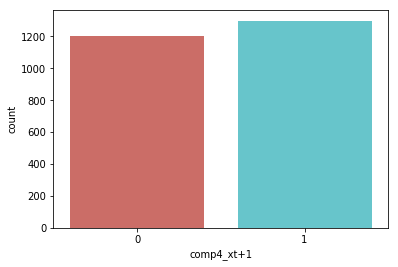

In [16]:
#Plot for general visualization and Idea
sb.countplot(x='comp4_xt+1',data=dflo, palette='hls')

In [17]:
Y = dflo['comp4_xt+1']


train_df, test_df, train_y, test_y = train_test_split(df4, Y, test_size = 0.3, random_state = 1) 
lr = linear_model.LogisticRegression()
model = lr.fit(train_df, train_y)
pred = model.predict(train_df)
pred2 = model.predict(test_df)
print("Correlation:",np.corrcoef(train_y,pred))
print("Correlation Test:",np.corrcoef(test_y,pred2))

Correlation: [[1.         0.18193692]
 [0.18193692 1.        ]]
Correlation Test: [[ 1.         -0.03457241]
 [-0.03457241  1.        ]]


Try doing logistic regression with cross validation. We see a definite increase in the correlation and from recall it can be seen that the upcoming prediction is that of price going up

In [20]:
logReg = logCV(cv=5)
logReg.fit(train_df, train_y)
print(classification_report(logReg.predict(test_df), test_y))
pred2 = logReg.predict(train_df)
pred3 = logReg.predict(test_df)
print("Correlation:",np.corrcoef(train_y,pred2))
print("Correlation:",np.corrcoef(test_y,pred3))

             precision    recall  f1-score   support

          0       0.48      0.46      0.47       359
          1       0.52      0.54      0.53       392

avg / total       0.50      0.50      0.50       751

Correlation: [[1.         0.27643295]
 [0.27643295 1.        ]]
Correlation: [[1.         0.00321872]
 [0.00321872 1.        ]]


## Model: SVM

In [248]:
svm_model = SVC()
svm_fit = svm_model.fit(train_df, train_y)
print('Score of SVM = %s' % svm_model.score(train_df, train_y))
print('Score of SVM = %s' % svm_model.score(test_df, test_y))

Score of SVM = 0.5102857142857142
Score of SVM = 0.5392809587217043


## Model: Random Forest Classifier
For this we perform classification in the same way as we did for the regressor

In [249]:
rf = RandomForestClassifier(n_estimators = 10, max_depth=5, min_samples_leaf= 5, max_features = 10, random_state = 1)
# Train the model on training data
rf.fit(train_df, train_y);
# Use the forest's predict method on the test data
pred3 = rf.predict(train_df)
pred4 = rf.predict(test_df)
print("Correlation:",np.corrcoef(train_y,pred3))
print("Correlation:",np.corrcoef(test_y,pred4))

Correlation: [[1.         0.46183583]
 [0.46183583 1.        ]]
Correlation: [[ 1.         -0.00375093]
 [-0.00375093  1.        ]]


In [250]:
# error_rate_bag = np.array([])
# num_trees_bag = np.array([])

# min_trees = 10
# max_trees = 100

# bagged_tree = RandomForestClassifier(warm_start=True, oob_score=True,max_depth=5, min_samples_leaf= 5, max_features = 10,random_state = 1)

# for i in range(min_trees,max_trees+1):
#     bagged_tree.set_params(n_estimators=i)
#     bagged_tree.fit(train_df, train_y)
#     error_rate_bag = np.append(error_rate_bag,bagged_tree.oob_score_)
#     num_trees_bag = np.append(num_trees_bag,i)
    
# plt.plot(num_trees_bag,error_rate_bag,c='red');
# plt.xlabel('Number of Trees');
# plt.ylabel('Accuracy');

In [251]:
# min_trees = 100
# max_trees = 350

# bagged_tree = RandomForestClassifier(warm_start=True, oob_score=True,max_depth=5, min_samples_leaf= 5, max_features = 10,random_state = 1)

# for i in range(min_trees,max_trees+1):
#     bagged_tree.set_params(n_estimators=i)
#     bagged_tree.fit(train_df4, train_y)
#     error_rate_bag = np.append(error_rate_bag,bagged_tree.oob_score_)
#     num_trees_bag = np.append(num_trees_bag,i)
    
# plt.plot(num_trees_bag,error_rate_bag,c='red');
# plt.xlabel('Number of Trees');
# plt.ylabel('Accuracy');

I am going to fix max_depth to 5 here to prevent over fitting

In [254]:
rff = RandomForestClassifier(n_estimators = 100, max_depth=5, min_samples_leaf= 5, max_features = 10, random_state = 1)
# Train the model on training data
rff.fit(train_df, train_y);
# Use the forest's predict method on the test data
pred3 = rf.predict(train_df)
pred4 = rf.predict(test_df)
print("Correlation:",np.corrcoef(train_y,pred3))
print("Correlation Test:",np.corrcoef(test_y,pred4))

Correlation: [[1.         0.46183583]
 [0.46183583 1.        ]]
Correlation Test: [[ 1.         -0.00375093]
 [-0.00375093  1.        ]]


## Part 4: Encapsulate the model and prediction steps into a function for the two best models found (use the exact 2 cells provided below to do this)

In [201]:
def predict_price(X_train, y_train, X_test):
    
    #We load data
    X_train['comp4_xt+1'] = y_train
    dff = X_train
    Y = np.array(dff['comp4_xt+1'])
    dff1= dff.drop('comp4_xt+1', axis = 1)
    
    #Add interaction terms
    #Using cross validation on a regression model
    #we look at the top 10 rinteraction terms comaring them with our baseline mean. 
    #The code is commented out because it takes a lot of time to process
    #It is present in the file where we test different models
    df3 = dff1.copy()
    int1 = np.array(dff1['comp6_xt-3'])
    int2 = np.array(dff1['comp3_xt-7'])
    int12 = int1*int2
    int3 = np.array(dff1['comp5_xt-7'])
    int13 = int1*int3
    df3['comp6_xt-3*comp3_xt-7'] = int12
    df3['comp6_xt-3*comp5_xt-7'] = int13
    df4 = df3.copy()
    int4 = np.array(df3['comp5_xt-19'])
    int5 = np.array(df3['comp4_xt-3'])
    int45 = int4*int5
    int6 = np.array(df3['comp8_xt-2'])
    int7 = np.array(df3['comp1_xt'])
    int67 = int6*int7
    df4['comp5_xt-19*comp4_xt-3'] = int45
    df4['comp8_xt-2*comp8_xt-2'] = int67  
    
    #Run OLS to find imp columns
    #Create a data frame with these columns
    model = sm.OLS(Y,df4)
    results = model.fit()
    sig_features = pd.DataFrame(results.pvalues, index=df4.columns, columns={'pvalue'})
    impCols = sig_features[sig_features['pvalue']<0.5].index.values
    df5 = df4[impCols]
    
    #Splitting data into training and testing by cross validation
    train_df5, test_df5, train_y, test_y,x_test_train, x_test_test = train_test_split(df5, Y,X_test, test_size = 0.3, random_state = 42)
 
    
#     #Running a Random Forest Regression
#     #Using optimal n_estimator determined by baggin
#     rf = RandomForestRegressor(n_estimators = 100, max_depth=5, max_features = 10, random_state = 1)
#     rf.fit(train_df5, train_y);
#     pred2 = rf.predict(train_df5)
#     pred3 = rf.predict(test_df5)
    
#     #Running a Random Forest Regression
#     #Using optimal n_estimator, max depth and max features determined by baggin
#     Reg = RandomForestRegressor(n_estimators = 100, max_depth=35,max_features=10 , random_state = 1)
#     Reg.fit(train_df5, train_y);
#     pred4 = Reg.predict(train_df5)
#     pred5 = Reg.predict(test_df5)

    #Since our linear Regression Model gave us the best TEST correlation we go with it
    lr = LinearRegression()
    lr.fit(train_df5,train_y)
    pred = lr.predict(train_df5)
    pred2 = lr.predict(x_test_train)
    plt.xlim(0,100)
    plt.ylim(-0.03,0.03)
    plt.ylabel('Transformed')
    plt.title('Test Data Performance')
    plt.plot(range(len(test_y)),test_y)
    plt.plot(range(len(x_test_train)),pred2)
    plt.legend(['True', 'Predicted'], loc='upper left')
    plt.xlabel('Time index t')
    print("Correlation:",np.corrcoef(train_y,pred))
    print("Correlation Test:",np.corrcoef(train_y,pred2))
    
#     print('Running Random Forest Regression on Data by bagging n_estimator only...')
#     print('Training Random Forest Regression on training...')
#     print("Correlation Train:",np.corrcoef(train_y,pred2))
#     print('Training Random Forest Regression on given data...')
#     #print("Correlation Test:",np.corrcoef(test_y,pred3))

 
    
#     print('Running Random Forest Regression on Data by bagging...')
#     print('Training Random Forest Regression on training...')
#     print("Correlation:",np.corrcoef(train_y,pred4))
#     print('Training Random Forest Regression on testing...')
#     print("Correlation Test:",np.corrcoef(test_y,pred5))
    
#     plt.xlim(0,100)
#     plt.ylim(-0.03,0.03)
#     plt.ylabel('Transformed')
#     plt.title('Train Data Performance')
#     plt.plot(range(len(train_y)),train_y)
#     plt.plot(range(len(test_df5)),pred5)
#     plt.legend(['True', 'Predicted'], loc='upper left')
#     plt.xlabel('Time index t')
    
    
    return pred2 #replace in np.array([]) with a numpy array of your predictions for y_hat_test

In [210]:
def predict_dir(X_train,y_train,X_test):
    
    df1['comp4_xt+1'] = df2
    dff = df1
    dflo = dff.copy()
    encode = lambda x: 1 if x > 0 else 0
    dflo['comp4_xt+1'] = dflo['comp4_xt+1'].map(encode)
    Y = dflo['comp4_xt+1']
    
    
    #Add interaction terms
    #Using cross validation on a regression model
    #we look at the top 10 rinteraction terms comaring them with our baseline mean. 
    #The code is commented out because it takes a lot of time to process
    #It is present in the file where we test different models
    df3 = dff1.copy()
    int1 = np.array(dff1['comp6_xt-3'])
    int2 = np.array(dff1['comp3_xt-7'])
    int12 = int1*int2
    int3 = np.array(dff1['comp5_xt-7'])
    int13 = int1*int3
    df3['comp6_xt-3*comp3_xt-7'] = int12
    df3['comp6_xt-3*comp5_xt-7'] = int13
    df4 = df3.copy()
    int4 = np.array(df3['comp5_xt-19'])
    int5 = np.array(df3['comp4_xt-3'])
    int45 = int4*int5
    int6 = np.array(df3['comp8_xt-2'])
    int7 = np.array(df3['comp1_xt'])
    int67 = int6*int7
    df4['comp5_xt-19*comp4_xt-3'] = int45
    df4['comp8_xt-2*comp8_xt-2'] = int67  
    
    #Run OLS to find imp columns
    #Create a data frame with these columns
    model = sm.OLS(Y,df4)
    results = model.fit()
    sig_features = pd.DataFrame(results.pvalues, index=df4.columns, columns={'pvalue'})
    impCols = sig_features[sig_features['pvalue']<0.1].index.values
    df5 = df4[impCols]
    
    #Splitting data into training and testing by cross validation
    train_df5, test_df5, train_y, test_y, x_test_train, x_test_test = train_test_split(df5, Y,X_test, test_size = 0.3, random_state = 42)
    
#     #Running a Random Forest Regression
#     #Using optimal n_estimator determined by baggin
#     rf = RandomForestClassifier(n_estimators = 100, max_depth=5, max_features = 10, random_state = 1)
#     #Train the model on training data
#     rf.fit(train_df5, train_y);
#     pred1 = rf.predict(train_df5)
#     pred2 = rf.predict(test_df5)
    
#     #Running a Random Forest Regression
#     #Using optimal n_estimator, max depth and max features determined by baggin
#     Reg = RandomForestClassifier(n_estimators = 100, max_depth=30,max_features=10 , random_state = 1)
#     Reg.fit(train_df5, train_y);
#     pred3 = Reg.predict(train_df5)
#     pred4 = Reg.predict(test_df5)
    
#     print('Running Random Forest Regression on Data by bagging n_estimator only...')
#     print('Training Random Forest Regression on training...')
#     print("Correlation:",np.corrcoef(train_y,pred1))
#     print('Training Random Forest Regression on testing...')
#     print("Correlation Test:",np.corrcoef(test_y,pred2))

    #SVM gave the best error
    svm_model = SVC()
    svm_fit = svm_model.fit(train_df5, train_y)
    pred = svm_model.predict(train_df5)
    pred2 = svm_model.predict(x_test_train)
    
#     print('Running Random Forest Regression on Data by bagging...')
#     print('Training Random Forest Regression on training...')
#     print("Correlation:",np.corrcoef(train_y,pred3))
#     print('Training Random Forest Regression on testing...')
#     print("Correlation Test:",np.corrcoef(test_y,pred4))
    if np.mean(pred2)>0.5:
        print("UP WOHOO")
    else:
        print("Oh no down")

    return np.mean(pred2) #replace in np.array([]) with a numpy array of your predictions for y_hat_test

In [211]:
predict_dir(df1, df2)

UP WOHOO


0.5153129161118508